In [1]:
# from marketsim.simulator.sampled_arrival_simulator import SimulatorSampledArrival
from marketsim.simulator.shock_simulator import ShockSimulator
from marketsim.fourheap.constants import BUY, SELL
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

Figure 6.6 - Pg 69

Notes: 
- Generating for both buy side and sell side shocks
- average max diference over 10 seeds
- inferring what the interval is, it not defined

Sell Side Shock: 

Shock: 0
    Seed: 10
    Seed: 11
    Seed: 12
    Seed: 13
    Seed: 14
    Seed: 15
    Seed: 16
    Seed: 17
    Seed: 18
    Seed: 19
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
    Seed: 25
    Seed: 26
    Seed: 27
    Seed: 28
    Seed: 29
    Seed: 30
    Seed: 31
    Seed: 32
    Seed: 33
    Seed: 34
    Seed: 35
    Seed: 36
    Seed: 37
    Seed: 38
    Seed: 39
Shock: 10
    Seed: 10
    Seed: 11
    Seed: 12
    Seed: 13
    Seed: 14
    Seed: 15
    Seed: 16
    Seed: 17
    Seed: 18
    Seed: 19
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
    Seed: 25
    Seed: 26
    Seed: 27
    Seed: 28
    Seed: 29
    Seed: 30
    Seed: 31
    Seed: 32
    Seed: 33
    Seed: 34
    Seed: 35
    Seed: 36
    Seed: 37
    Seed: 38
    Seed: 39
Shock: 20
    Seed: 10
    Seed: 11
    Seed: 12
    Seed: 13
    Seed: 14
    Seed: 15
    Seed: 16
    Seed: 17
    Seed: 18
    Seed: 19
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed:

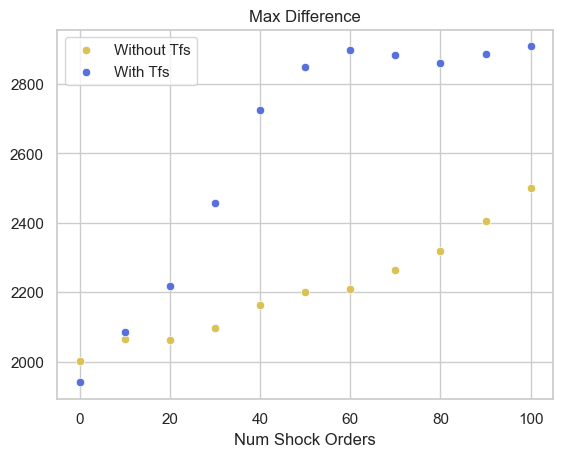

In [5]:
%%time

plot_no_trend = {}
plot_trend = {}

for shock in range(0, 101, 10):
    print(f"Shock: {shock}")
    for seed in range(10, 40):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = shock*2.5,
                shock_volume = shock,
                shock_side = SELL,
                L = 4,
                PI = 50.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

        max_diff_nt = 0

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            max_diff_nt = max(max_diff_nt, abs(f[times_no_trend[i]] - prices_no_trend[i]))

        
        if shock not in plot_no_trend.keys():
            plot_no_trend[shock] = 0

        plot_no_trend[shock] += max_diff_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = shock*2.5,
                shock_volume = shock,
                shock_side = SELL,
                L = 4,
                PI = 50.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        max_diff_t = 0

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            max_diff_t = max(max_diff_t, abs(f[times_trend[i]] - prices_trend[i]))

        if shock not in plot_trend.keys():
            plot_trend[shock] = 0

        plot_trend[shock] += max_diff_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():

    X_nt.append(k)
    Y_nt.append(v / 30)
    # print(k , v)


X_t = []
Y_t = []

for k, v in plot_trend.items():

    X_t.append(k)
    Y_t.append(v / 30)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Num Shock Orders')
plt.ylabel('')
plt.title('Max Difference')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.6/"

# save plot
plt.savefig(base + f"6.6_SELL.png")


Buy Side Shock: 

Shock: 0
    Seed: 10
    Seed: 11
    Seed: 12
    Seed: 13
    Seed: 14
    Seed: 15
    Seed: 16
    Seed: 17
    Seed: 18
    Seed: 19
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
    Seed: 25
    Seed: 26
    Seed: 27
    Seed: 28
    Seed: 29
    Seed: 30
    Seed: 31
    Seed: 32
    Seed: 33
    Seed: 34
    Seed: 35
    Seed: 36
    Seed: 37
    Seed: 38
    Seed: 39
Shock: 10
    Seed: 10
    Seed: 11
    Seed: 12
    Seed: 13
    Seed: 14
    Seed: 15
    Seed: 16
    Seed: 17
    Seed: 18
    Seed: 19
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed: 24
    Seed: 25
    Seed: 26
    Seed: 27
    Seed: 28
    Seed: 29
    Seed: 30
    Seed: 31
    Seed: 32
    Seed: 33
    Seed: 34
    Seed: 35
    Seed: 36
    Seed: 37
    Seed: 38
    Seed: 39
Shock: 20
    Seed: 10
    Seed: 11
    Seed: 12
    Seed: 13
    Seed: 14
    Seed: 15
    Seed: 16
    Seed: 17
    Seed: 18
    Seed: 19
    Seed: 20
    Seed: 21
    Seed: 22
    Seed: 23
    Seed:

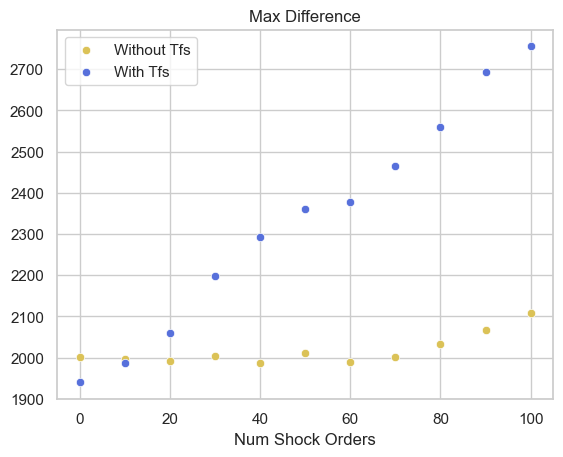

In [4]:
%%time

plot_no_trend = {}
plot_trend = {}

for shock in range(0, 101, 10):
    print(f"Shock: {shock}")
    for seed in range(10, 40):
        print(f"    Seed: {seed}")
        sim_no_trend =ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = shock*2.5,
                shock_volume = shock,
                shock_side = BUY,
                L = 4,
                PI = 50.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

        max_diff_nt = 0

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            max_diff_nt = max(max_diff_nt, abs(f[times_no_trend[i]] - prices_no_trend[i]))

        
        if shock not in plot_no_trend.keys():
            plot_no_trend[shock] = 0

        plot_no_trend[shock] += max_diff_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = shock*2.5,
                shock_volume = shock,
                shock_side = BUY,
                L = 4,
                PI = 50.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        max_diff_t = 0

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            max_diff_t = max(max_diff_t, abs(f[times_trend[i]] - prices_trend[i]))

        if shock not in plot_trend.keys():
            plot_trend[shock] = 0
        plot_trend[shock] += max_diff_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():

    X_nt.append(k)
    Y_nt.append(v / 30)
    # print(k , v)


X_t = []
Y_t = []

for k, v in plot_trend.items():

    X_t.append(k)
    Y_t.append(v / 30)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Num Shock Orders')
plt.ylabel('')
plt.title('Max Difference')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.6/"

# save plot
plt.savefig(base + f"6.6_BUY.png")


Figure 6.7 - Pg 70

Notes: 
- Generating for both buy side and sell side shocks
- average mispricing over 10 seeds
- inferring some paramter - shock interval, trend params. The paper uses equilibrium, which cant be replicated

Sell Side Shock:

Shock: 0
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 10
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 20
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 30
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 40
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 50
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 60
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 70
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 80
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 90
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 100
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
CPU times: user 6min 27s, sys: 1min 11s, total: 7min 38s
Wall time: 3min 7s


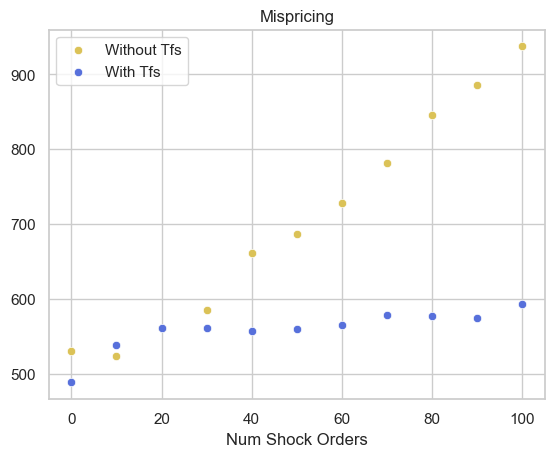

In [13]:
%%time

plot_no_trend = {}
plot_trend = {}

for shock in range(0, 101, 10):
    print(f"Shock: {shock}")
    for seed in range(50, 55):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = shock*10,
                shock_volume = shock,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

        squared_diff_nt = []

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            squared_diff_nt.append((f[times_no_trend[i]] - prices_no_trend[i]) ** 2)

        mean_squared_diff_nt = np.mean(squared_diff_nt)
        rmsd_nt = np.sqrt(mean_squared_diff_nt)
        
        if shock not in plot_no_trend.keys():
            plot_no_trend[shock] = 0

        plot_no_trend[shock] += rmsd_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = True,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = shock*10,
                shock_volume = shock,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        squared_diff_t = []

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            squared_diff_t.append((f[times_trend[i]] - prices_trend[i]) ** 2)

        mean_squared_diff_t = np.mean(squared_diff_t)
        rmsd_t = np.sqrt(mean_squared_diff_t)
        
        if shock not in plot_trend.keys():
            plot_trend[shock] = 0

        plot_trend[shock] += rmsd_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():

    X_nt.append(k)
    Y_nt.append(v / 10)


X_t = []
Y_t = []

for k, v in plot_trend.items():

    X_t.append(k)
    Y_t.append(v / 10)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Num Shock Orders')
plt.ylabel('')
plt.title('Mispricing')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.7/"

# save plot
plt.savefig(base + f"6.7_SELL.png")


Buy Side Shock:

Shock: 0
    Seed: 80
    Seed: 81
    Seed: 82
    Seed: 83
    Seed: 84
    Seed: 85
    Seed: 86
    Seed: 87
    Seed: 88
    Seed: 89
    Seed: 90
    Seed: 91
    Seed: 92
    Seed: 93
    Seed: 94
    Seed: 95
    Seed: 96
    Seed: 97
    Seed: 98
    Seed: 99
Shock: 10
    Seed: 80
    Seed: 81
    Seed: 82
    Seed: 83
    Seed: 84
    Seed: 85
    Seed: 86
    Seed: 87
    Seed: 88
    Seed: 89
    Seed: 90
    Seed: 91
    Seed: 92
    Seed: 93
    Seed: 94
    Seed: 95
    Seed: 96
    Seed: 97
    Seed: 98
    Seed: 99
Shock: 20
    Seed: 80
    Seed: 81
    Seed: 82
    Seed: 83
    Seed: 84
    Seed: 85
    Seed: 86
    Seed: 87
    Seed: 88
    Seed: 89
    Seed: 90
    Seed: 91
    Seed: 92
    Seed: 93
    Seed: 94
    Seed: 95
    Seed: 96
    Seed: 97
    Seed: 98
    Seed: 99
Shock: 30
    Seed: 80
    Seed: 81
    Seed: 82
    Seed: 83
    Seed: 84
    Seed: 85
    Seed: 86
    Seed: 87
    Seed: 88
    Seed: 89
    Seed: 90
    Seed: 91
    Seed: 92
    Seed: 93

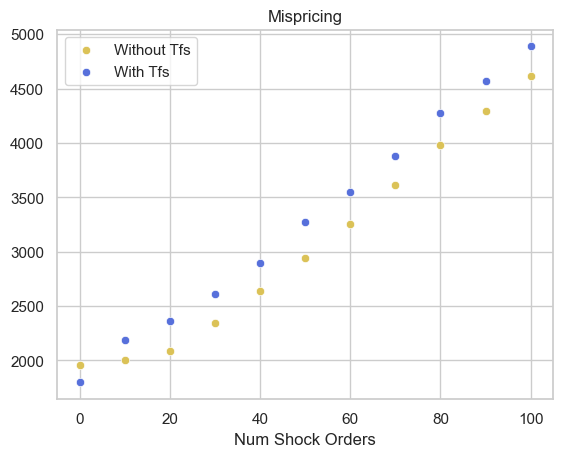

In [14]:
%%time

plot_no_trend = {}
plot_trend = {}

for shock in range(0, 101, 10):
    print(f"Shock: {shock}")
    for seed in range(80, 100):
        print(f"    Seed: {seed}")
        sim_no_trend =ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = shock*10,
                shock_volume = shock,
                shock_side = BUY,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

        squared_diff_nt = []

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            squared_diff_nt.append((f[times_no_trend[i]] - prices_no_trend[i]) ** 2)

        mean_squared_diff_nt = np.mean(squared_diff_nt)
        rmsd_nt = np.sqrt(mean_squared_diff_nt)
        
        if shock not in plot_no_trend.keys():
            plot_no_trend[shock] = 0

        plot_no_trend[shock] += rmsd_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = shock*10,
                shock_volume = shock,
                shock_side = BUY,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        squared_diff_t = []

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            squared_diff_t.append((f[times_trend[i]] - prices_trend[i]) ** 2)

        mean_squared_diff_t = np.mean(squared_diff_t)
        rmsd_t = np.sqrt(mean_squared_diff_t)
        
        if shock not in plot_trend.keys():
            plot_trend[shock] = 0

        plot_trend[shock] += rmsd_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():

    X_nt.append(k)
    Y_nt.append(v / 10)


X_t = []
Y_t = []

for k, v in plot_trend.items():

    X_t.append(k)
    Y_t.append(v / 10)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Num Shock Orders')
plt.ylabel('')
plt.title('Mispricing')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.7/"

# save plot
plt.savefig(base + f"6.7_BUY.png")


In [2]:
%%time

plot_no_trend = {}
plot_trend = {}

for shock in range(0, 101, 10):
    print(f"Shock: {shock}")
    for seed in range(80, 100):
        print(f"    Seed: {seed}")
        sim_no_trend =ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = shock*10,
                shock_volume = shock,
                shock_side = BUY,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

        squared_diff_nt = []

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            squared_diff_nt.append((f[times_no_trend[i]] - prices_no_trend[i]) ** 2)

        mean_squared_diff_nt = np.mean(squared_diff_nt)
        rmsd_nt = np.sqrt(mean_squared_diff_nt)
        
        if shock not in plot_no_trend.keys():
            plot_no_trend[shock] = 0

        plot_no_trend[shock] += rmsd_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = shock*10,
                shock_volume = shock,
                shock_side = BUY,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        squared_diff_t = []

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            squared_diff_t.append((f[times_trend[i]] - prices_trend[i]) ** 2)

        mean_squared_diff_t = np.mean(squared_diff_t)
        rmsd_t = np.sqrt(mean_squared_diff_t)
        
        if shock not in plot_trend.keys():
            plot_trend[shock] = 0

        plot_trend[shock] += rmsd_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():

    X_nt.append(k)
    Y_nt.append(v / 10)


X_t = []
Y_t = []

for k, v in plot_trend.items():

    X_t.append(k)
    Y_t.append(v / 10)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Num Shock Orders')
plt.ylabel('')
plt.title('Mispricing')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.7/"

# save plot
plt.savefig(base + f"6.7_BUY_no_obs.png")


Shock: 0
    Seed: 80

4 [MatchedOrder(price=1000000511.0426259, order=Order(price=1000000511.0426259, order_type=1, quantity=1, agent_id=290, time=949, order_id=3652803, asset_id=1), time=950), MatchedOrder(price=1000000511.0426259, order=Order(price=1000000511.0426259, order_type=1, quantity=1, agent_id=125, time=949, order_id=6884061, asset_id=1), time=950), MatchedOrder(price=1000000511.0426259, order=Order(price=1000000511.0426259, order_type=-1, quantity=1, agent_id=290, time=949, order_id=837116, asset_id=1), time=950), MatchedOrder(price=1000000511.0426259, order=Order(price=1000000511.0426259, order_type=-1, quantity=1, agent_id=200, time=948, order_id=2994605, asset_id=1), time=950)]
0.0

8 [MatchedOrder(price=1000000809.8981525, order=Order(price=1000000809.8981525, order_type=1, quantity=1, agent_id=300, time=1051, order_id=4731065, asset_id=1), time=1052), MatchedOrder(price=1000000809.8981525, order=Order(price=1000000809.8981525, order_type=1, quantity=1, agent_id=551, t

Shock: 0
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 10
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 20
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 30
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 40
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 50
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 60
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 70
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 80
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 90
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
Shock: 100
    Seed: 50
    Seed: 51
    Seed: 52
    Seed: 53
    Seed: 54
CPU times: user 6min 31s, sys: 1min 11s, total: 7min 43s
Wall time: 3min 5s


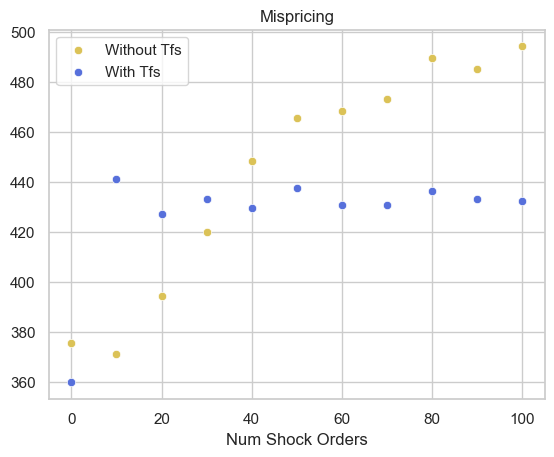

In [ ]:
%%time

plot_no_trend = {}
plot_trend = {}

for shock in range(0, 101, 10):
    print(f"Shock: {shock}")
    for seed in range(50, 55):
        print(f"    Seed: {seed}")
        sim_no_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=0,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = shock*10,
                shock_volume = shock,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_no_trend.run()
        prices_no_trend, times_no_trend = sim_no_trend.get_transaction_history()

        squared_diff_nt = []

        for i in range(len(prices_no_trend)):
            if times_no_trend[i] == len(f): continue
            squared_diff_nt.append((f[times_no_trend[i]] - prices_no_trend[i]) ** 2)

        mean_squared_diff_nt = np.mean(squared_diff_nt)
        rmsd_nt = np.sqrt(mean_squared_diff_nt)
        
        if shock not in plot_no_trend.keys():
            plot_no_trend[shock] = 0

        plot_no_trend[shock] += rmsd_nt

        sim_trend = ShockSimulator(
                num_background_agents=66,
                num_trend_agents=486,
                sim_time=10000,
                num_assets = 1,
                lam = 2e-3,  
                lam_trend = 5e-3,
                mean = 1e9,
                r = 0,
                shock_var = 1e3,
                q_max = 10,
                pv_var = 1e6,
                shade=[500, 1000],
                obs_var = 1e6,
                eta = 0.8,
                observe_transactions = False,
                strategic_variance = 1e6,
                shock_entry_time = 5000,
                shock_interval = shock*10,
                shock_volume = shock,
                shock_side = SELL,
                L = 4,
                PI = 100.0,
                texp = 50,
                random_seed = seed,
                )

        _, _, _, f = sim_trend.run()
        prices_trend, times_trend = sim_trend.get_transaction_history()

        squared_diff_t = []

        for i in range(len(prices_trend)):
            if times_trend[i] == len(f): continue
            squared_diff_t.append((f[times_trend[i]] - prices_trend[i]) ** 2)

        mean_squared_diff_t = np.mean(squared_diff_t)
        rmsd_t = np.sqrt(mean_squared_diff_t)
        
        if shock not in plot_trend.keys():
            plot_trend[shock] = 0

        plot_trend[shock] += rmsd_t


# Plot using Seaborn and Matplotlib
plt.clf()

sns.set(style="whitegrid")
palette = sns.color_palette("hls", 8)

X_nt = []
Y_nt = []

for k, v in plot_no_trend.items():

    X_nt.append(k)
    Y_nt.append(v / 10)


X_t = []
Y_t = []

for k, v in plot_trend.items():

    X_t.append(k)
    Y_t.append(v / 10)
    
sns.scatterplot(x=X_nt, y=Y_nt, color=palette[1], label="Without Tfs")
sns.scatterplot(x=X_t, y=Y_t, color=palette[5], label="With Tfs")

# Set plot labels and title
plt.xlabel('Num Shock Orders')
plt.ylabel('')
plt.title('Mispricing')

# Display legend
plt.legend()

base = "/Users/rishithseelam/Code/SURE-SRG/market-sim-py/results/fig_6.7/"

# save plot
plt.savefig(base + f"6.7_SELL_no_obs.png")
